## **Live Digit Recognition using KNN Classifier**
> In this project I have used dataset from MNIST to train my model.

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


**Loading the dataset**

In [2]:
train_dataset = '/Projects/Live-digit-recognition-using-KNN-Classifier/dataset/train.csv'
test_dataset = '/Projects/Live-digit-recognition-using-KNN-Classifier/dataset/test.csv'

train = pd.read_csv(train_dataset)
test = pd.read_csv(test_dataset)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (5000, 784)
y_train shape:  (5000,)


In [6]:
# Let's see some sample images in the dataset and visualize them
samples = np.random.randint(0, X_train.shape[0], size=12)
list(enumerate(samples))

[(0, 3281),
 (1, 1693),
 (2, 745),
 (3, 4344),
 (4, 2428),
 (5, 2739),
 (6, 2822),
 (7, 2148),
 (8, 2925),
 (9, 3755),
 (10, 3434),
 (11, 3463)]

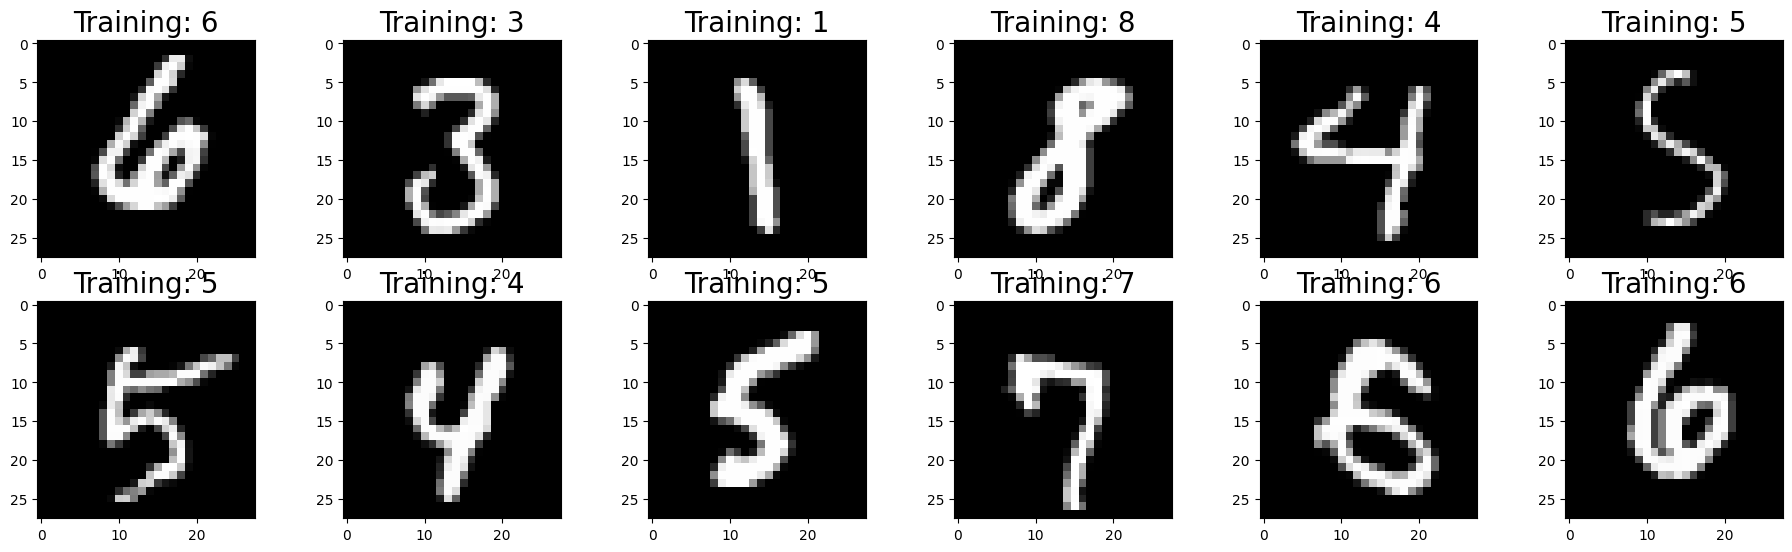

In [10]:
plt.figure(figsize=(23,13))
for index, sample in enumerate(samples):
    plt.subplot(4, 6, index+1)
    plt.imshow(np.reshape(X_train.values[sample], (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i' % y_train.values[sample], fontsize = 20)
    plt.gray()

### **Building the model**

In [11]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=2,weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

**Confusion Matrix**

In [12]:
predictions_on_training = knn.predict(X_train)
confusion_matrix_test = confusion_matrix(y_true=y_train, y_pred=predictions_on_training)

In [13]:
confusion_matrix_test

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 500,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 500,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 500]], dtype=int64)

**Accuracy**

In [14]:
accuracy_test = float(np.trace(confusion_matrix_test))/np.sum(confusion_matrix_test)

print('Accuracy on training set: ', accuracy_test)

Accuracy on training set:  1.0


**K Nearest Neighbors**

In [16]:
random_index = np.random.choice(X_train.shape[0],1)
random_index

array([4360])

In [17]:
query = X_train.iloc[random_index].values


In [19]:
print('Query index: ', query)

Query index:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  13 141 216 216 241  76   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  19 194 222 196 215 252 231
   19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 172 252  25   0  85 252 244  56   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  22  28   0   0  85
  252 225   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   

In [20]:
nearest_neighbors = knn.kneighbors(X=query, n_neighbors=5, return_distance=True)
print('Nearest neighbors: ', nearest_neighbors)

Nearest neighbors:  (array([[   0.        , 1767.79834823, 1796.51802106, 1830.99481157,
        1861.66860639]]), array([[4360, 4099, 4317, 2272, 4410]], dtype=int64))


c:\Users\Lenovo V15\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [21]:
distances = nearest_neighbors[0]
results = nearest_neighbors[1][0]

In [22]:
print('Distances: ', distances)
print('Results: ', results)

Distances:  [[   0.         1767.79834823 1796.51802106 1830.99481157 1861.66860639]]
Results:  [4360 4099 4317 2272 4410]


**Query Vs Search Result**

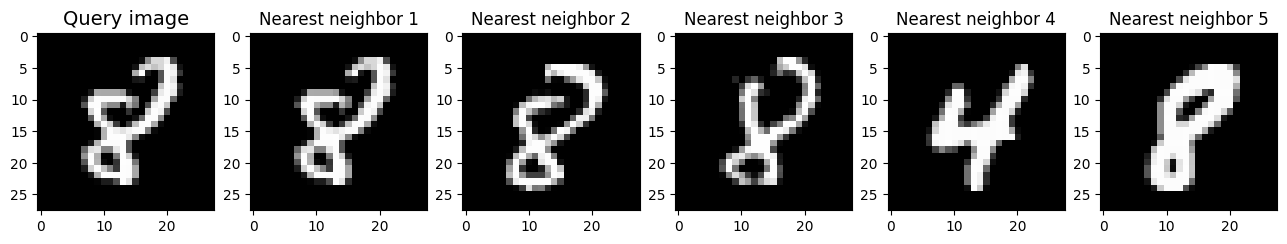

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,6,1)
plt.imshow(np.array(query).reshape(28,28), cmap=plt.cm.gray)
plt.title('Query image', fontsize=14)
plt.gray()

for i , j in enumerate(results):
    plt.subplot(1,6,i+2)
    plt.imshow(np.array(X_train.iloc[j]).reshape(28,28), cmap=plt.cm.gray)
    plt.title('Nearest neighbor %i' % (i+1))
    plt.gray()

> **Conclusion** : We have successfully built a KNN model that can recognize handwritten digits with an accuracy of 100%. As result we can see the query image and the search result image are same (Except the 4th image which is 4 but the query image is 8)

## Good Night I am going to sleep now :)